# Method dev: metrics
16/08/21

Using geometric tensor formalism to compose & calculate some system/problem metrics.

To consider:

* Aligment metrics
   * $cos^n(\theta)$
   * $cos^{3D}$
   
* Information content
   * Channel functions (from alignment?)
   * Information/sensitivity (alignment x matE functions)
   * Continuum density matrix

## Setup

In [1]:
# To control display of warnings...
# WORKING IN SOME CASES... but not all, maybe ipython/env version issues?
# https://stackoverflow.com/a/9031848
import warnings
warnings.filterwarnings('ignore')  # set 'once' or 'ignore'
warnings.simplefilter('ignore')

# 16/08/21 ADDED TO util.env.isnotebook(), not yet tested.

In [2]:
# For ipython and other deprecation warnings, https://stackoverflow.com/questions/63413807/deprecation-warning-from-jupyter-should-run-async-will-not-call-transform-c
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)



In [3]:
# Standard libs
import sys
import os
from pathlib import Path
import numpy as np
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()


In [4]:

# For local module testing, include path to module here, otherwise use global installation
# For editable 
local = False

if local:
    import sys
    if sys.platform == "win32":
        modPath = r'D:\code\github\ePSproc'  # Win test machine
        winFlag = True
    else:
        modPath = r'~/github/ePSproc/'  # Linux test machine
        winFlag = False

    sys.path.append(modPath)

# Import base package
import epsproc as ep  

# Set data path
# Note this is set here from ep.__path__, but may not be correct in all cases - depends on where the Github repo is.
epDemoDataPath = Path(ep.__path__[0]).parent/'data'



* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* pyevtk not found, VTK export not available. 


## Load test data

### Class version

In [5]:
# Class dev code
from epsproc.classes.multiJob import ePSmultiJob
from epsproc.classes.base import ePSbase

# Instantiate class object.
# Minimally this needs just the dataPath, if verbose = 1 is set then some useful output will also be printed.
dataPath = os.path.join(epDemoDataPath, 'photoionization')
data = ePSbase(dataPath, verbose = 1)

# ScanFiles() - this will look for data files on the path provided, and read from them.
data.scanFiles()

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/paul/github/ePSproc/epsproc/IO.py:657: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  attribs.append(['E', np.float(parseLineDigits(dumpSeg[3][2])[0]), 'eV'])
/home/paul/github/ePSproc/epsproc/IO.py:662: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To sil


*** Job orb8 details
Key: orb8
Dir /home/paul/github/ePSproc/data/photoionization, 1 file(s).
{   'batch': 'ePS ethylene, batch C2H4_1.0-100.0eV, orbital orb8_B3u',
    'event': 'HOMO ioinzation (B3u), wavefn run, 0.5:1:10.5, sph grid',
    'orbE': -10.32127880310325,
    'orbLabel': 'B3u'}

*** Job orb5 details
Key: orb5
Dir /home/paul/github/ePSproc/data/photoionization, 1 file(s).
{   'batch': 'ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2',
    'event': ' N2 X-state (3sg-1)',
    'orbE': -17.34181645456815,
    'orbLabel': '3sg-1'}

*** Job orb11 details
Key: orb11
Dir /home/paul/github/ePSproc/data/photoionization, 1 file(s).
{   'batch': 'NO2 input file for ePolyScat',
    'event': ' Ionization of orbital 10 (A2)',
    'orbE': -14.378496492380059,
    'orbLabel': 'A2'}


## Alignment metrics

Here we'll start with the molecular alignment defined in terms of axis distribution moments (ADMs), given by parameters $A^K_{Q,S}(t)$:

$ P(\Omega,t) = \sum_{K,Q,S} A^K_{Q,S}(t)D^K_{Q,S}(\Omega)$

Where $P(\Omega,t)$ is the full axis distribution probability, expanded for Euler angles $\Omega$.

This reduces to the 2D case if $S=0$:

$ P(\theta,\phi,t) = \sum_{K,Q} A^K_{Q,0}(t)D^K_{Q,0}(\Omega) = \sum_{K,Q} A^K_{Q}(t)Y_{K,Q}(\Omega)$

In the current code (v1.3.0, 16/08/21), the ADMs can be set directly, and expanded trivially for the 2D case (3D case to do). (Note that the 3D case is supported for AF-BLM calculations, but not yet for direct expansion & visualisation.)


/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/paul/github/ePSproc/epsproc/_sns_matrixMod.py:84: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
/home/paul/github/ePSproc/epsproc/_sns_matrixMod.py:282: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.la

Plotting data (No filename), pType=a, thres=0.01, with Seaborn


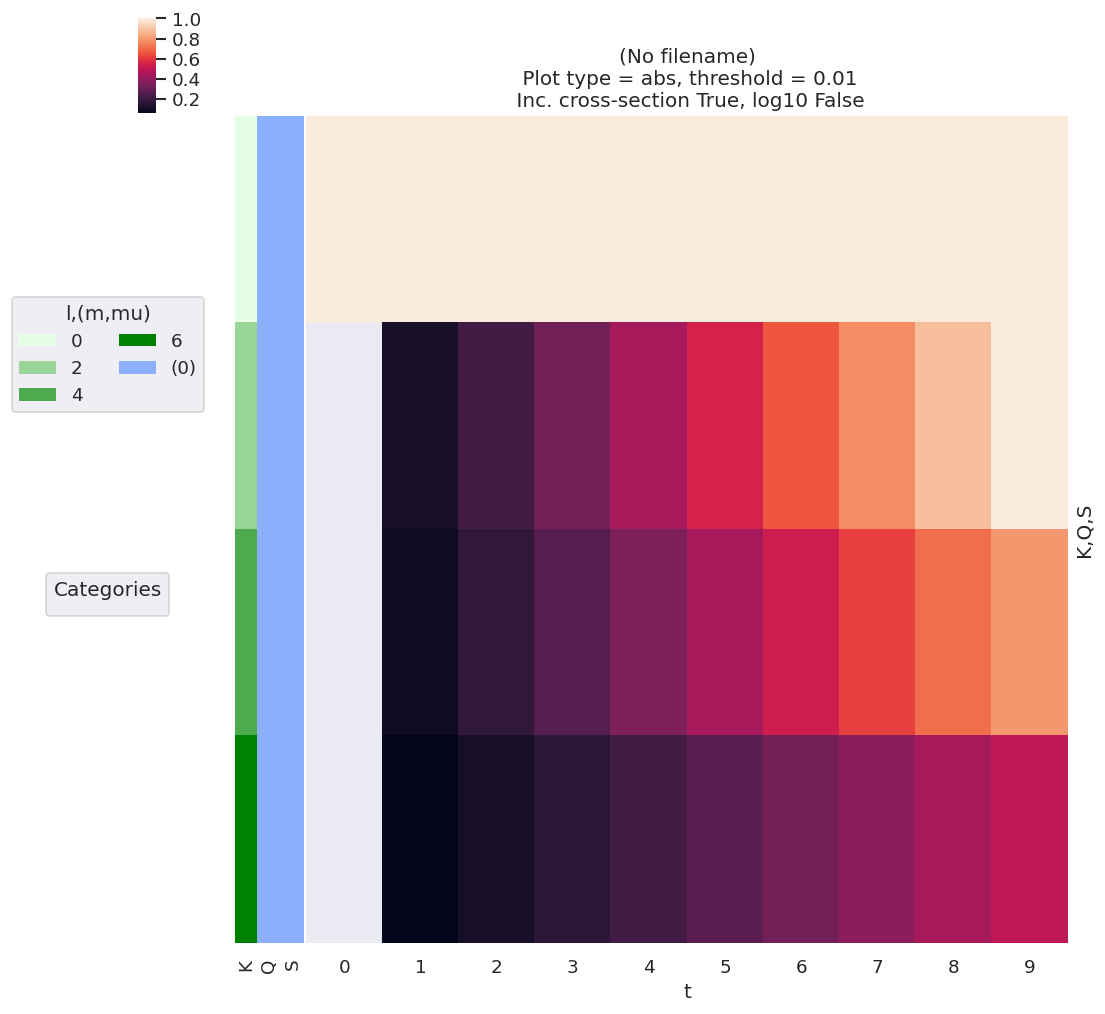

In [37]:
# Set ADMs for increasing alignment...
tPoints = 10
# inputADMs = np.asarray([[0,0,0, *np.ones(10)], [2,0,0, *np.linspace(0,1,tPoints)], [4,0,0, *np.linspace(0,0.5,tPoints)]])
inputADMs = [[0,0,0, *np.ones(10)], [2,0,0, *np.linspace(0,1,tPoints)], [4,0,0, *np.linspace(0,0.8,tPoints)], [6,0,0, *np.linspace(0,0.5,tPoints)]]

ADMs = ep.setADMs(ADMs = inputADMs)
ep.lmPlot(ADMs, xDim='t');

In [38]:
# data.setADMs(ADMs = ADMs['ADM'], t=ADMs['time'].squeeze(), KQSLabels = ADMs['ADMlist'], addS = True)  
# data.setADMs(ADMs = ADMs)   # setADMs not yet in class, but see PEMtk fitClass.py for method example

# Set to separate dataset for testing
ADMs.attrs['jobLabel'] = 'Alignment data testing'
data.data['ADM'] = {'ADM': ADMs}

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset: ADM, ADM


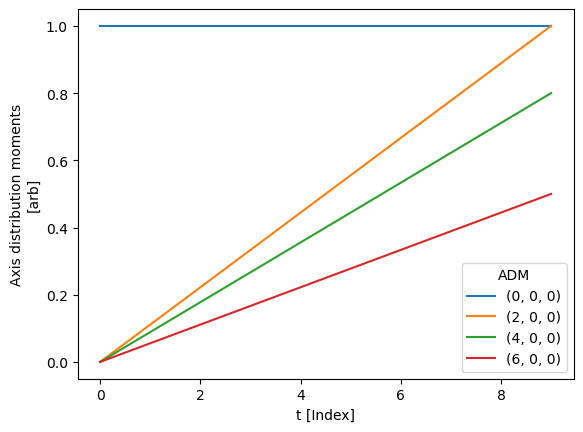

In [39]:
data.ADMplot(keys = 'ADM')   #padPlot(keys = 'orb11', dataType='AFBLM', selDims = {'Labels':'z'}, pStyle='grid', reducePhi='sum', facetDims=['t', 'Eke'])

Using default sph betas.


/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/xarray/core/dataarray.py:1954: PendingDeprecationWarning: dropping variables using `drop` will be deprecated; using drop_vars is encouraged.
  ds = self._to_temp_dataset().drop(labels, dim, errors=errors)
/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/home/paul/anaconda3/envs/epsdev-

Summing over dims: set()
Grid plot: Alignment data testing, dataType: ADM, plotType: a


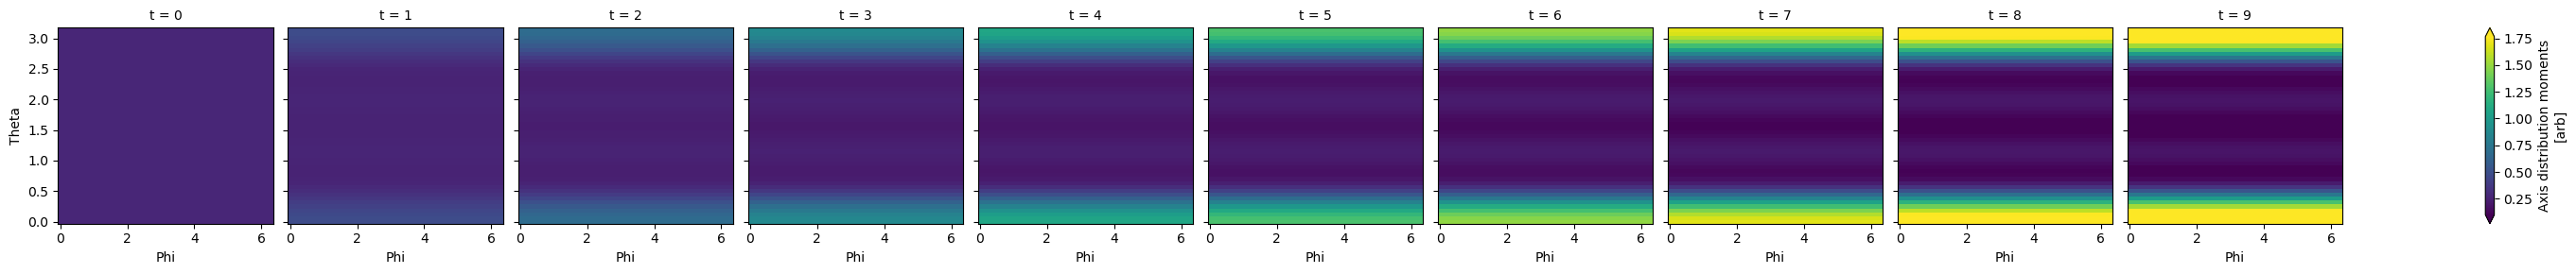

In [40]:
# Axis distributions P(theta,phi) vs. t
data.padPlot(keys = 'ADM', dataType='ADM', Etype = 't', pStyle='grid', facetDims=['t'])

Using default sph betas.
Summing over dims: set()
Grid plot: Alignment data testing, dataType: ADM, plotType: a


/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/xarray/core/dataarray.py:1954: PendingDeprecationWarning: dropping variables using `drop` will be deprecated; using drop_vars is encouraged.
  ds = self._to_temp_dataset().drop(labels, dim, errors=errors)
/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


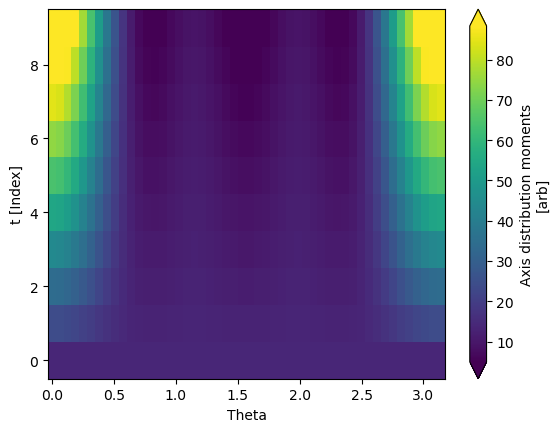

In [42]:
# Axis distributions P(theta) vs. t (summed over phi)
Pt = data.padPlot(keys = 'ADM', dataType='ADM', Etype = 't', pStyle='grid', reducePhi='sum', returnFlag = True)  #, facetDims=['t', 'Eke'])

In [43]:
# The returned data array contains the plotted values
Pt

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/xarray/core/formatting.py:142: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(x, (float, np.float)):


<xarray.DataArray (t: 10, Theta: 50)>
array([[ 14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959,  14.10473959,  14.10473959,
         14.10473959,  14.10473959],
       [ 24.19565208,  23.9764963 ,  23.33912425,  22.34143665,
         21.07230056,  19.64116092,  18.1654695 ,  16.7575701 ,
         15.51272382,  14.49977183,  13.75554387,  13.28358539,
         13.05717249,  13.02599782,  13.12542567,  13.28689722,
         13.44796116,  13.56052064,  13.59620513,  13.54824392,
         13.4297663 ,  13.26899869,  13.10229003,  12.96620644,
         12.89004876,  12.89004876,  12.96620644,  13.10229003,
         13.26899869,  13.4297663 ,  13.54824392,  13.59620513,
         13.56052064,  13.44796116,  13.28689722,  13.12542567,
         13.02599782,  13.05717249,  13.28358539,  13.75554387,
         14.49977183,  15.51272382,  16.7575701 ,  18.1654695 ,
         19.64116092,  21.07230056,  22.34143665,  23.33912425,
         23.9764963 ,  24.19565208],
       [ 34.28656458,  33.84825302,  32.57350891,  30.57813371,
         28.03986154,  25.17758225,  22.22619941,  19.41040062,
         16.92070806,  14.89480407,  13.40634815,  12.4624312 ,
         12.00960539,  11.94725605,  12.14611175,  12.46905486,
         12.79118273,  13.01630169,  13.08767068,  12.99174825,
         12.75479301,  12.43325778,  12.09984048,  11.82767328,
         11.67535793,  11.67535793,  11.82767328,  12.09984048,
         12.43325778,  12.75479301,  12.99174825,  13.08767068,
         13.01630169,  12.79118273,  12.46905486,  12.14611175,
         11.94725605,  12.00960539,  12.4624312 ,  13.40634815,
         14.89480407,  16.92070806,  19.41040062,  22.22619941,
         25.17758225,  28.03986154,  30.57813371,  32.57350891,
         33.84825302,  34.28656458],
       [ 44.37747707,  43.72000973,  41.80789358,  38.81483077,
         35.00742251,  30.71400359,  26.28692932,  22.06323113,
         18.32869229,  15.28983631,  13.05715243,  11.641277  ,
         10.96203828,  10.86851428,  11.16679784,  11.65121249,
         12.13440429,  12.47208274,  12.57913622,  12.43525258,
         12.07981972,  11.59751688,  11.09739092,  10.68914013,
         10.4606671 ,  10.4606671 ,  10.68914013,  11.09739092,
         11.59751688,  12.07981972,  12.43525258,  12.57913622,
         12.47208274,  12.13440429,  11.65121249,  11.16679784,
         10.86851428,  10.96203828,  11.641277  ,  13.05715243,
         15.28983631,  18.32869229,  22.06323113,  26.28692932,
         30.71400359,  35.00742251,  38.81483077,  41.80789358,
         43.72000973,  44.37747707],
       [ 54.46838956,  53.59176645,  51.04227824,  47.05152784,
         41.97498349,  36.25042492,  30.34765923,  24.71606165,
         19.73667652,  15.68486855,  12.7079567 ,  10.8201228 ,
          9.91447118,   9.78977251,  10.18748392,  10.83337013,
         11.47762586,  11.92786379,  12.07060177,  11.87875692,
         11.40484643,  10.76177598,  10.09494136,   9.55060698,
          9.24597627,   9.24597627,   9.55060698,  10.09494136,
         10.76177598,  11.40484643,  11.87875692,  12.07060177,
         11.92786379,  11.47762586,  10.83337013,  10.18748392,
          9.78977251,   9.91447118,  10.8201228 ,  12.7079567 ,
         15.68486855,  19.73667652,  24.71606165,  30.34765923,
         36.25042492,  41.97498349,  4

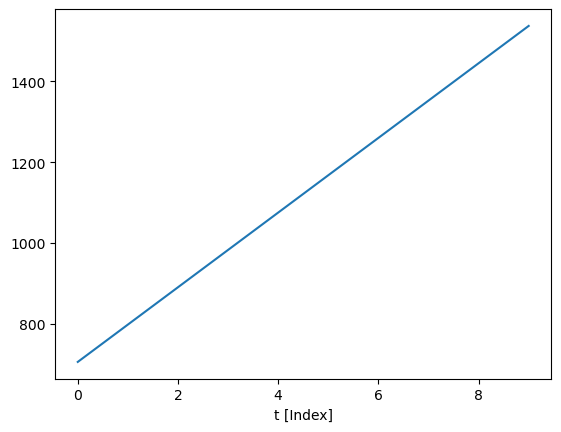

In [45]:
# Check norm
Pt.sum('Theta').plot()

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


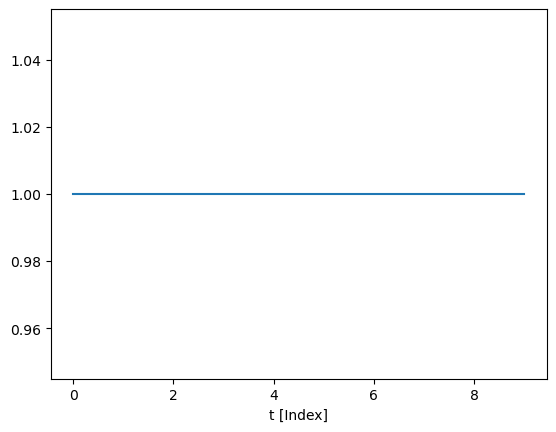

In [46]:
# Renorm by pop
Pt = Pt/Pt.sum('Theta')

# Check norm
Pt.sum('Theta').plot()

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


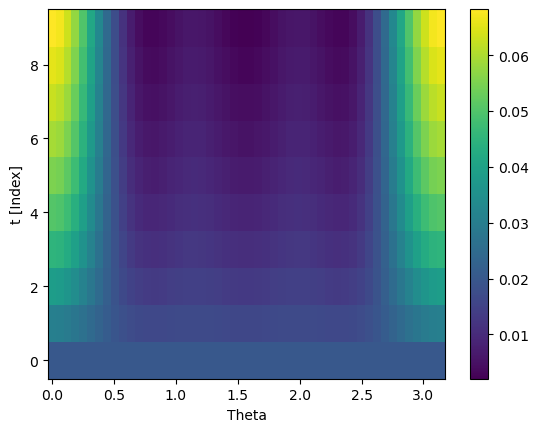

In [47]:
# Check renorm version
Pt.plot()

### $\langle cos^n(\theta, t)\rangle$

Expectation values of $\langle cos^n(\theta, t)\rangle$ can be calculated directly from the $P(\theta,t)$ distributions:

$\langle cos^n(\theta, t)\rangle = \int_{\theta} cos^n(\theta)P(\theta,t) d\theta$


Refs:

<div class="csl-bib-body" style="line-height: 1.35; ">
  <div class="csl-entry" style="clear: left; ">
    <div class="csl-left-margin" style="float: left; padding-right: 0.5em;text-align: right; width: 1em;">[1]</div><div class="csl-right-inline" style="margin: 0 .4em 0 1.5em;">P. Hockett, “General phenomenology of ionization from aligned molecular ensembles,” <i>New Journal of Physics</i>, vol. 17, no. 2, p. 023069, Feb. 2015, doi: <a href="https://doi.org/10.1088/1367-2630/17/2/023069">10.1088/1367-2630/17/2/023069</a>.</div>
  </div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2F10.1088%2F1367-2630%2F17%2F2%2F023069&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=General%20phenomenology%20of%20ionization%20from%20aligned%20molecular%20ensembles&amp;rft.jtitle=New%20Journal%20of%20Physics&amp;rft.volume=17&amp;rft.issue=2&amp;rft.aufirst=Paul&amp;rft.aulast=Hockett&amp;rft.au=Paul%20Hockett&amp;rft.date=2015-02&amp;rft.pages=023069&amp;rft.issn=1367-2630"></span>
</div>

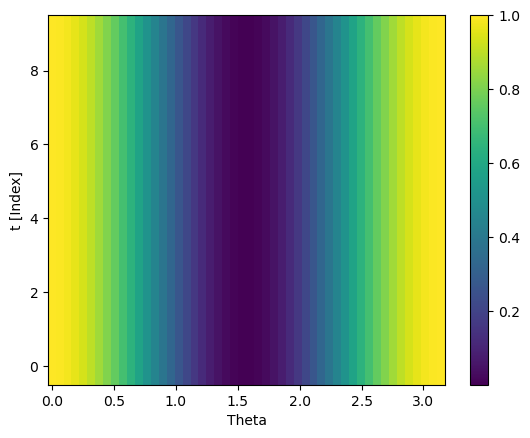

In [134]:
# Generate basis fn.

import xarray as xr

# cn = xr.zeros_like(Pt)  # Set to same form as Pt
# # cn = np.cos(cn.Theta)**2  # Set values - only keeps Theta dim in this case
# cn = (np.cos(cn.Theta)**2).expand_dims('t')
# # cn = np.cos(cn)**2  # Set values
# # cn.apply_ufunc(np.cos)

N = 2
cn = xr.ones_like(Pt) * (np.cos(Pt.Theta)**N)  # Use multiplication to keep t coord

cn.plot()
# cn

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


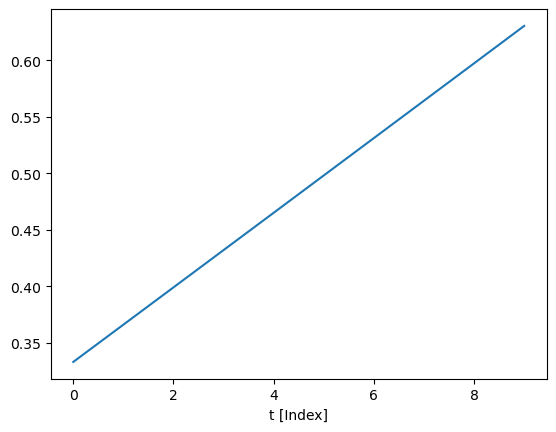

In [157]:
Jt = np.sin(Pt.Theta) # Jacobian
cnMetric = (Pt * cn * Jt).sum('Theta')  # Include Jacobian?
# cnMetric = 2*(Pt * cn).sum('Theta')  # x2 for 0:2pi range correction?

# norm = Pt.Theta.size/(cn.sum('Theta')+Pt.sum('Theta')) # Renorm by # elements/sum
norm = (Pt * Jt).sum('Theta') # From old matlab code, should be correct renorm: sum(P.*cos(q).^2.*sin(q))/sum(P.*sin(q)) 
                            # Should also have sum(cos(q)) on the bottom? OK if already normalise?
                            # Actually, should just renorm Pt correctly above, i.e. by sum(Pt.*sin(q))! (Currently by only sum(Pt))
(cnMetric/norm).plot()

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


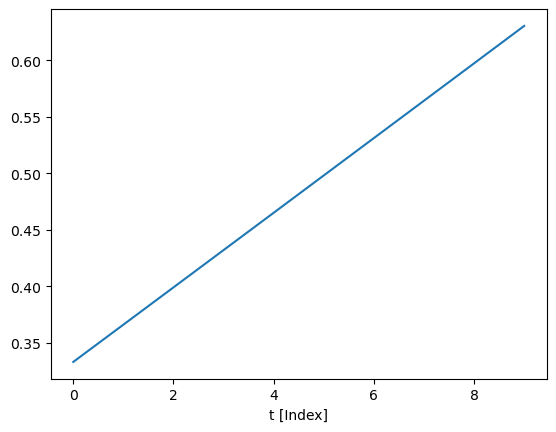

In [158]:
# Equivalent result with dot product function

# Pt.dot(cn, dims='Theta').plot()  #.sum('Theta')  # No normalization - gives non-linear result, but looks OK, although min value = 0.53 (should be 1/3)

(Pt.dot(cn * Jt, dims='Theta')/Pt.dot(Jt, dims='Theta')).plot()

In [137]:
cn.sum('Theta')

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/xarray/core/formatting.py:142: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(x, (float, np.float)):


<xarray.DataArray (t: 10)>
array([25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9

To check: missing additional 1/2 or other norm factor here? Should have 0.33 for isotropic case. OR need to renorm Pt and cn by area.

Functionalise and extend to higher orders...

In [163]:
def computeCNs(Pt, N = None, Nrange = [2,10], Nstep = 2):
    """
    Function to compute <cos^N> expectation values from P(theta) distributions.
    
    NOTE: currently assumes 1D case. Should generalise!
    
    """
    
    if N is None:
        N = np.arange(Nrange[0], Nrange[1], Nstep)
    
    # Generate cos^N basis
    #  cn = xr.ones_like(Pt) * (np.cos(Pt.Theta)**N)  # Use multiplication to keep t coord - this fails for array-like N with broadcast errors
    cn = xr.ones_like(Pt) * np.cos(Pt.Theta).expand_dims({'N':N}).T.pipe(np.power,N)  # OK with transpose
    
    Jt = np.sin(Pt.Theta) # Jacobian
    
    norm = (Pt * Jt).sum('Theta')
    cnMetric = (Pt * cn * Jt).sum('Theta')/norm
    
#     cnMetric = Pt.dot(cn, dims='Theta') # Multiply and sum over Theta - dot version (no Jacobian or renorm)
#     cnMetric = (Pt.dot(cn * Jt, dims='Theta')/Pt.dot(Jt, dims='Theta'))  # Dot version with renorm
    
    return cnMetric

/home/paul/github/ePSproc/epsproc/_sns_matrixMod.py:84: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
/home/paul/github/ePSproc/epsproc/_sns_matrixMod.py:282: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
/home/paul/github/ePSproc/epsproc/basicPlotters.py:762: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20

Set dataType (No dataType)
Plotting data (No filename), pType=a, thres=0.01, with Seaborn


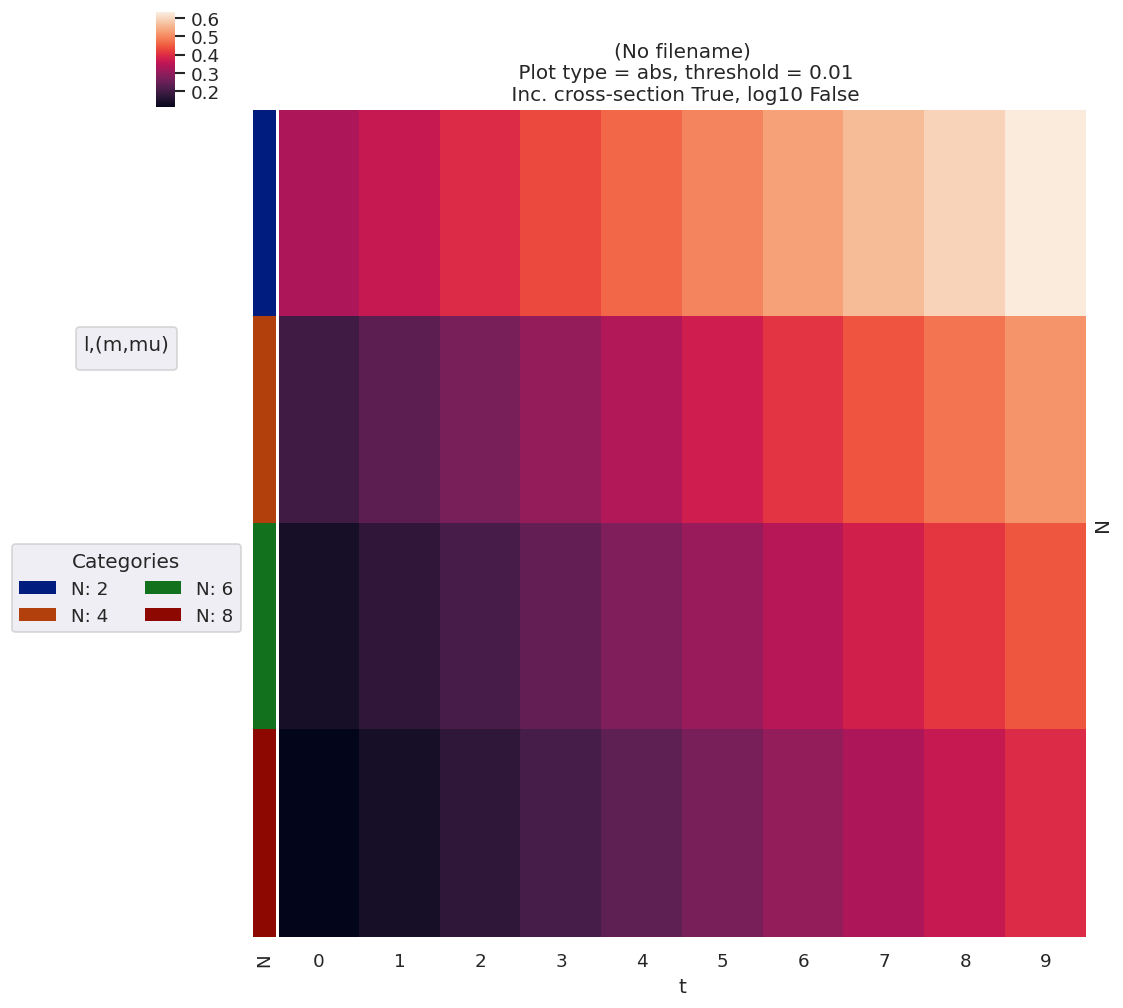

In [165]:
# Compute and plot for a range of N
cnMetric = computeCNs(Pt)

# cnMetric.plot()  # Basic plot
ep.lmPlot(cnMetric, xDim='t');  # With lmPlot()

In [166]:
cnMetric.min()

/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/paul/anaconda3/envs/epsdev-xr15/lib/python3.7/site-packages/xarray/core/formatting.py:142: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(x, (float, np.float)):


<xarray.DataArray ()>
array(0.11080593)

In [167]:
cnMetric.sel(N=2)  # = 0.33 for isotropic case OK

<xarray.DataArray (t: 10)>
array([0.33310473, 0.36608715, 0.3990858 , 0.43210066, 0.46513177,
       0.49817913, 0.53124276, 0.56432266, 0.59741885, 0.63053134])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9
    N        int64 2

#### CN function dev scratch

In [70]:
N = np.arange(0,10,2)
xr.ones_like(Pt) * (np.cos(Pt.Theta)**N)

ValueError: operands could not be broadcast together with shapes (50,) (5,) 

In [113]:
# np.power(np.cos(Pt.Theta),N)
# temp = np.cos(Pt.Theta).expand_dims({'N':N})  #.pipe(np.power,N)
# temp = np.cos(Pt.Theta).pipe(np.power,N)
temp = np.cos(Pt.Theta).expand_dims({'N':N}).T.pipe(np.power,N)  # OK with transpose
temp

<xarray.DataArray 'Theta' (Theta: 50, N: 5)>
array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 9.95895007e-01, 9.91806865e-01, 9.87735504e-01,
        9.83680857e-01],
       [1.00000000e+00, 9.83647432e-01, 9.67562270e-01, 9.51740141e-01,
        9.36176745e-01],
       [1.00000000e+00, 9.63458379e-01, 9.28252047e-01, 8.94332213e-01,
        8.61651864e-01],
       [1.00000000e+00, 9.35659352e-01, 8.75458423e-01, 8.19130861e-01,
        7.66427451e-01],
       [1.00000000e+00, 9.00706811e-01, 8.11272759e-01, 7.30718900e-01,
        6.58163490e-01],
       [1.00000000e+00, 8.59174675e-01, 7.38181122e-01, 6.34226526e-01,
        5.44911369e-01],
       [1.00000000e+00, 8.11744901e-01, 6.58929784e-01, 5.34882892e-01,
        4.34188460e-01],
       [1.00000000e+00, 7.59196284e-01, 5.76378998e-01, 4.37584793e-01,
        3.32212749e-01],
       [1.00000000e+00, 7.02391672e-01, 4.93354060e-01, 3.46527783e-01,
        2.43398229e-01],
       [1.00000000e+00, 6.42263793e-01, 4.12502780e-01, 2.64935600e-01,
        1.70158544e-01],
       [1.00000000e+00, 5.79799948e-01, 3.36167979e-01, 1.94910177e-01,
        1.13008910e-01],
       [1.00000000e+00, 5.16025789e-01, 2.66282615e-01, 1.37408696e-01,
        7.09064309e-02],
       [1.00000000e+00, 4.51988487e-01, 2.04293592e-01, 9.23383518e-02,
        4.17358719e-02],
       [1.00000000e+00, 3.88739533e-01, 1.51118425e-01, 5.87457058e-02,
        2.28367782e-02],
       [1.00000000e+00, 3.27317473e-01, 1.07136728e-01, 3.50677230e-02,
        1.14782785e-02],
       [1.00000000e+00, 2.68730855e-01, 7.22162724e-02, 1.94067406e-02,
        5.21518999e-03],
       [1.00000000e+00, 2.13941670e-01, 4.57710381e-02, 9.79233233e-03,
        2.09498793e-03],
       [1.00000000e+00, 1.63849555e-01, 2.68466766e-02, 4.39881602e-03,
        7.20744046e-04],
       [1.00000000e+00, 1.19277021e-01, 1.42270077e-02, 1.69695509e-03,
        2.02407748e-04],
       [1.00000000e+00, 8.09559476e-02, 6.55386544e-03, 5.30574387e-04,
        4.29531523e-05],
       [1.00000000e+00, 4.95155660e-02, 2.45179128e-03, 1.21401833e-04,
        6.01128049e-06],
       [1.00000000e+00, 2.54721265e-02, 6.48829228e-04, 1.65270602e-05,
        4.20979367e-07],
       [1.00000000e+00, 9.22042150e-03, 8.50161727e-05, 7.83884947e-07,
        7.22774962e-09],
       [1.00000000e+00, 1.02730362e-03, 1.05535274e-06, 1.08416769e-09,
        1.11376940e-12],
       [1.00000000e+00, 1.02730362e-03, 1.05535274e-06, 1.08416769e-09,
        1.11376940e-12],
       [1.00000000e+00, 9.22042150e-03, 8.50161727e-05, 7.83884947e-07,
        7.22774962e-09],
       [1.00000000e+00, 2.54721265e-02, 6.48829228e-04, 1.65270602e-05,
        4.20979367e-07],
       [1.00000000e+00, 4.95155660e-02, 2.45179128e-03, 1.21401833e-04,
        6.01128049e-06],
       [1.00000000e+00, 8.09559476e-02, 6.55386544e-03, 5.30574387e-04,
        4.29531523e-05],
       [1.00000000e+00, 1.19277021e-01, 1.42270077e-02, 1.69695509e-03,
        2.02407748e-04],
       [1.00000000e+00, 1.63849555e-01, 2.68466766e-02, 4.39881602e-03,
        7.20744046e-04],
       [1.00000000e+00, 2.13941670e-01, 4.57710381e-02, 9.79233233e-03,
        2.09498793e-03],
       [1.00000000e+00, 2.68730855e-01, 7.22162724e-02, 1.94067406e-02,
        5.21518999e-03],
       [1.00000000e+00, 3.27317473e-01, 1.07136728e-01, 3.50677230e-02,
        1.14782785e-02],
       [1.00000000e+00, 3.88739533e-01, 1.51118425e-01, 5.87457058e-02,
        2.28367782e-02],
       [1.00000000e+00, 4.51988487e-01, 2.04293592e-01, 9.23383518e-02,
        4.17358719e-02],
       [1.00000000e+00, 5.16025789e-01, 2.66282615e-01, 1.37408696e-01,
        7.09064309e-02],
       [1.00000000e+00, 5.79799948e-01, 3.36167979e-01, 1.94910177e-01,
        1.13008910e-01],
       [1.00000000e+00, 6.42263793e-01, 4.12502780e-01, 2.64935600e-01,
        1.70158544e-01],
       [1.00000000e+00, 7.02391672e-01, 4.93354060e-01, 3.46527783e-01,
   

In [110]:
 N = np.arange(0, 10, 2)  # , ndmin=2)  # Can't set ndmin here?
np.power(temp.T,N)  # AH, works with transpose.

<xarray.DataArray 'Theta' (Theta: 50, N: 5)>
array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 9.95895007e-01, 9.91806865e-01, 9.87735504e-01,
        9.83680857e-01],
       [1.00000000e+00, 9.83647432e-01, 9.67562270e-01, 9.51740141e-01,
        9.36176745e-01],
       [1.00000000e+00, 9.63458379e-01, 9.28252047e-01, 8.94332213e-01,
        8.61651864e-01],
       [1.00000000e+00, 9.35659352e-01, 8.75458423e-01, 8.19130861e-01,
        7.66427451e-01],
       [1.00000000e+00, 9.00706811e-01, 8.11272759e-01, 7.30718900e-01,
        6.58163490e-01],
       [1.00000000e+00, 8.59174675e-01, 7.38181122e-01, 6.34226526e-01,
        5.44911369e-01],
       [1.00000000e+00, 8.11744901e-01, 6.58929784e-01, 5.34882892e-01,
        4.34188460e-01],
       [1.00000000e+00, 7.59196284e-01, 5.76378998e-01, 4.37584793e-01,
        3.32212749e-01],
       [1.00000000e+00, 7.02391672e-01, 4.93354060e-01, 3.46527783e-01,
        2.43398229e-01],
       [1.00000000e+00, 6.42263793e-01, 4.12502780e-01, 2.64935600e-01,
        1.70158544e-01],
       [1.00000000e+00, 5.79799948e-01, 3.36167979e-01, 1.94910177e-01,
        1.13008910e-01],
       [1.00000000e+00, 5.16025789e-01, 2.66282615e-01, 1.37408696e-01,
        7.09064309e-02],
       [1.00000000e+00, 4.51988487e-01, 2.04293592e-01, 9.23383518e-02,
        4.17358719e-02],
       [1.00000000e+00, 3.88739533e-01, 1.51118425e-01, 5.87457058e-02,
        2.28367782e-02],
       [1.00000000e+00, 3.27317473e-01, 1.07136728e-01, 3.50677230e-02,
        1.14782785e-02],
       [1.00000000e+00, 2.68730855e-01, 7.22162724e-02, 1.94067406e-02,
        5.21518999e-03],
       [1.00000000e+00, 2.13941670e-01, 4.57710381e-02, 9.79233233e-03,
        2.09498793e-03],
       [1.00000000e+00, 1.63849555e-01, 2.68466766e-02, 4.39881602e-03,
        7.20744046e-04],
       [1.00000000e+00, 1.19277021e-01, 1.42270077e-02, 1.69695509e-03,
        2.02407748e-04],
       [1.00000000e+00, 8.09559476e-02, 6.55386544e-03, 5.30574387e-04,
        4.29531523e-05],
       [1.00000000e+00, 4.95155660e-02, 2.45179128e-03, 1.21401833e-04,
        6.01128049e-06],
       [1.00000000e+00, 2.54721265e-02, 6.48829228e-04, 1.65270602e-05,
        4.20979367e-07],
       [1.00000000e+00, 9.22042150e-03, 8.50161727e-05, 7.83884947e-07,
        7.22774962e-09],
       [1.00000000e+00, 1.02730362e-03, 1.05535274e-06, 1.08416769e-09,
        1.11376940e-12],
       [1.00000000e+00, 1.02730362e-03, 1.05535274e-06, 1.08416769e-09,
        1.11376940e-12],
       [1.00000000e+00, 9.22042150e-03, 8.50161727e-05, 7.83884947e-07,
        7.22774962e-09],
       [1.00000000e+00, 2.54721265e-02, 6.48829228e-04, 1.65270602e-05,
        4.20979367e-07],
       [1.00000000e+00, 4.95155660e-02, 2.45179128e-03, 1.21401833e-04,
        6.01128049e-06],
       [1.00000000e+00, 8.09559476e-02, 6.55386544e-03, 5.30574387e-04,
        4.29531523e-05],
       [1.00000000e+00, 1.19277021e-01, 1.42270077e-02, 1.69695509e-03,
        2.02407748e-04],
       [1.00000000e+00, 1.63849555e-01, 2.68466766e-02, 4.39881602e-03,
        7.20744046e-04],
       [1.00000000e+00, 2.13941670e-01, 4.57710381e-02, 9.79233233e-03,
        2.09498793e-03],
       [1.00000000e+00, 2.68730855e-01, 7.22162724e-02, 1.94067406e-02,
        5.21518999e-03],
       [1.00000000e+00, 3.27317473e-01, 1.07136728e-01, 3.50677230e-02,
        1.14782785e-02],
       [1.00000000e+00, 3.88739533e-01, 1.51118425e-01, 5.87457058e-02,
        2.28367782e-02],
       [1.00000000e+00, 4.51988487e-01, 2.04293592e-01, 9.23383518e-02,
        4.17358719e-02],
       [1.00000000e+00, 5.16025789e-01, 2.66282615e-01, 1.37408696e-01,
        7.09064309e-02],
       [1.00000000e+00, 5.79799948e-01, 3.36167979e-01, 1.94910177e-01,
        1.13008910e-01],
       [1.00000000e+00, 6.42263793e-01, 4.12502780e-01, 2.64935600e-01,
        1.70158544e-01],
       [1.00000000e+00, 7.02391672e-01, 4.93354060e-01, 3.46527783e-01,
   

In [104]:
# Above should work...? Not sure why broadcasting is broken!
# Example from https://numpy.org/doc/stable/reference/generated/numpy.power.html

x1 = np.arange(6)
x2 = np.array([[1, 2, 3, 3, 2, 1], [1, 2, 3, 3, 2, 1]])

x1**x2

array([[ 0,  1,  8, 27, 16,  5],
       [ 0,  1,  8, 27, 16,  5]])

In [108]:
# Try flipping - also OK, UNLESS x1.T is used!
x2 = np.arange(6)
x1 = np.array([[1, 2, 3, 3, 2, 1], [1, 2, 3, 3, 2, 1]])

x1**x2  # OK
# (x1.T)**x2  # Dim broadcast error in this case.

ValueError: operands could not be broadcast together with shapes (6,2) (6,) 

In [106]:
x1.shape

(2, 6)

In [107]:
x2.shape

(6,)

In [114]:
xr.ones_like(Pt) * np.cos(Pt.Theta).expand_dims({'N':N}).T.pipe(np.power,N)

<xarray.DataArray (t: 10, Theta: 50, N: 5)>
array([[[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        ...,
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        ...,
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        ...,
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        ...,
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        ...,
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        ...,
        [1.        , 0.98364743, 0.96756227, 0.95174014, 0.93617675],
        [1.        , 0.99589501, 0.99180686, 0.9877355 , 0.98368086],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9
  * Theta    (Theta) float64 0.0 0.06411 0.1282 0.1923 ... 3.013 3.077 3.142
  * N        (N) int64 0 2 4 6 8

## Versions

In [ ]:
import scooby
scooby.Report(additional=['epsproc', 'holoviews', 'hvplot', 'xarray', 'matplotlib', 'bokeh'])

In [ ]:
# Check current Git commit for local ePSproc version
from pathlib import Path
!git -C {Path(ep.__file__).parent} branch
!git -C {Path(ep.__file__).parent} log --format="%H" -n 1

In [ ]:
# Check current remote commits
!git ls-remote --heads git://github.com/phockett/ePSproc